## **Car Price Prediction**

### **Context**
Geely Auto, a Chinese automobile company, is entering the U.S. market and aims to understand the key factors influencing car prices. This dataset provides various attributes of cars sold in the American market.

### **Dataset Variables**
- **CarID**: Identification Number for Each Car  
- **SafetyRating**: Car's Safety Rating  
- **CarName**: Name of the Car Model  
- **FuelType**: Type of Fuel Used (Gasoline, Diesel, Electric, etc.)  
- **Aspiration**: Type of Aspiration (Standard or Turbocharged)  
- **NumDoors**: Number of Doors on the Car  
- **BodyStyle**: Style of the Car's Body (Sedan, Coupe, SUV, etc.)  
- **DriveWheelType**: Type of Drive Wheels (Front, Rear, All)  
- **EngineLocation**: Location of the Car's Engine (Front or Rear)  
- **Wheelbase**: Length of the Car's Wheelbase  
- **CarLength**: Overall Length of the Car  
- **CarWidth**: Width of the Car  
- **CarHeight**: Height of the Car  
- **CurbWeight**: Weight of the Car without Passengers or Cargo  
- **EngineType**: Type of Engine (Gas, Diesel, Electric, etc.)  

Additional relevant factors that may impact pricing:  
- **Horsepower**: Engine power, which influences performance.  
- **Torque**: Important for acceleration and towing capacity.  
- **Mileage (MPG or kWh/mile)**: Fuel efficiency or energy consumption.  
- **Transmission Type**: Automatic vs. Manual.  
- **Brand Reputation**: Luxury vs. Economy brands.  
- **Technology Features**: Safety, infotainment, driver assistance.  

### **Objective**
Identify the most significant factors affecting car prices and develop a predictive model.  


In [99]:
# Import Modules

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')

Data Loading

In [100]:
path="/home/student24/Desktop/DataSets/Car Prediction/CarPrice_Assignment.csv"
car=pd.read_csv(path)

car.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Structure and Statistics

In [101]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [102]:
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [103]:
# Summary Statistics
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [104]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:
    
    print(f"Category in {col} is : {car[col].unique()}")



Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


 ### **Statistics Insights**
#### **Car Pricing**  
- Prices range from **$5,118 to $45,400**, with an average of **$13,276**.  
- The dataset includes both **affordable and high-end vehicles**.  

#### **Performance Factors**  
- **Horsepower** varies between **48 HP and 288 HP**, influencing performance.  
- **Fuel efficiency**: City mileage ranges from **13 to 49 MPG**, highway from **16 to 54 MPG**.  
- **Engine size** plays a major role in performance and fuel consumption.  

#### **Vehicle Characteristics**  
- **Weight** ranges from **1,488 lbs to 4,066 lbs**, impacting efficiency.  
- **Car length** varies between **141.1 inches and 208.1 inches**.  

#### **Risk & Market Positioning**  
- **Symboling (risk rating)** ranges from **-2 to 3**, indicating varying safety levels.  
- The dataset covers a **diverse range of cars**, from compact to luxury models.  


## Exploratory Data Analysis

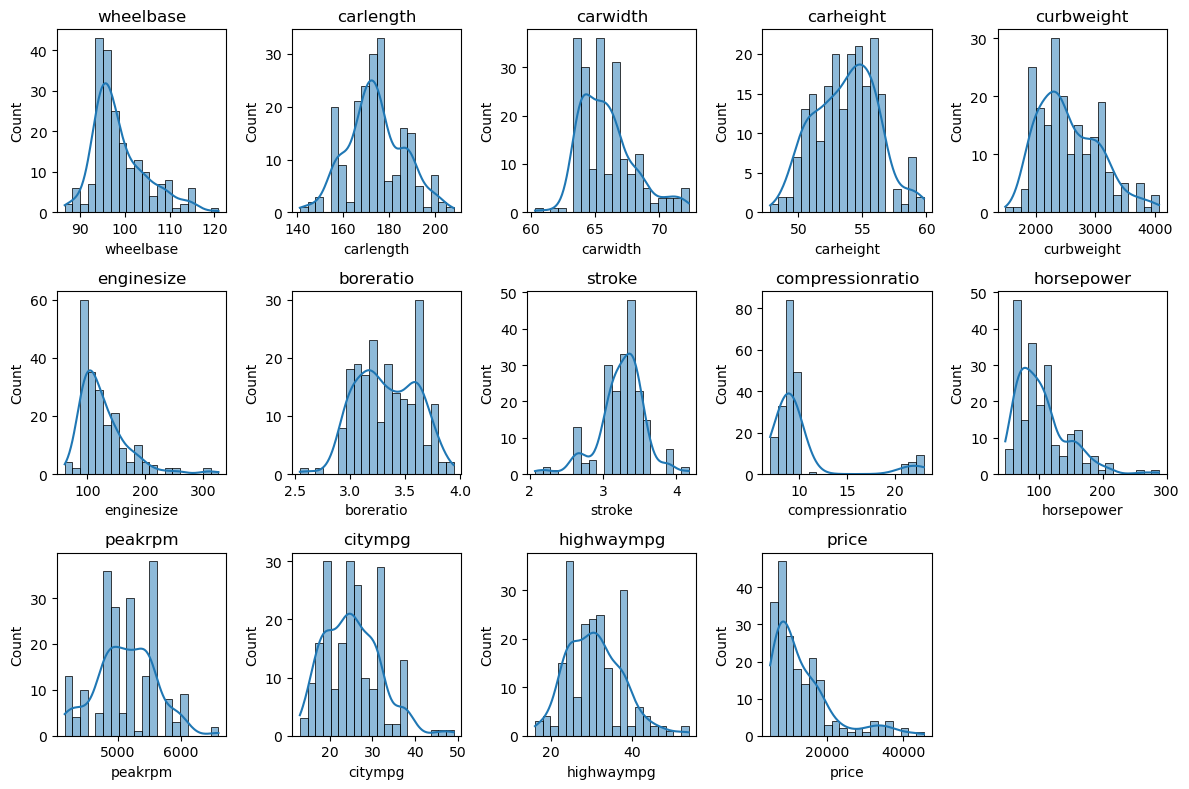

In [105]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=car[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


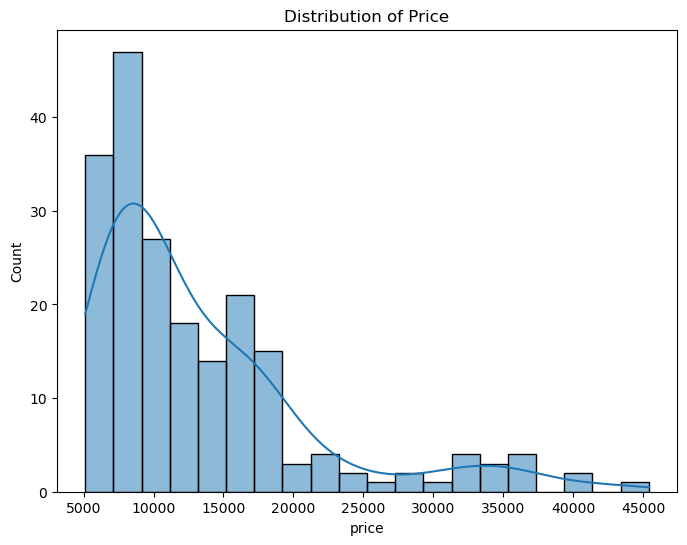

In [106]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=car['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

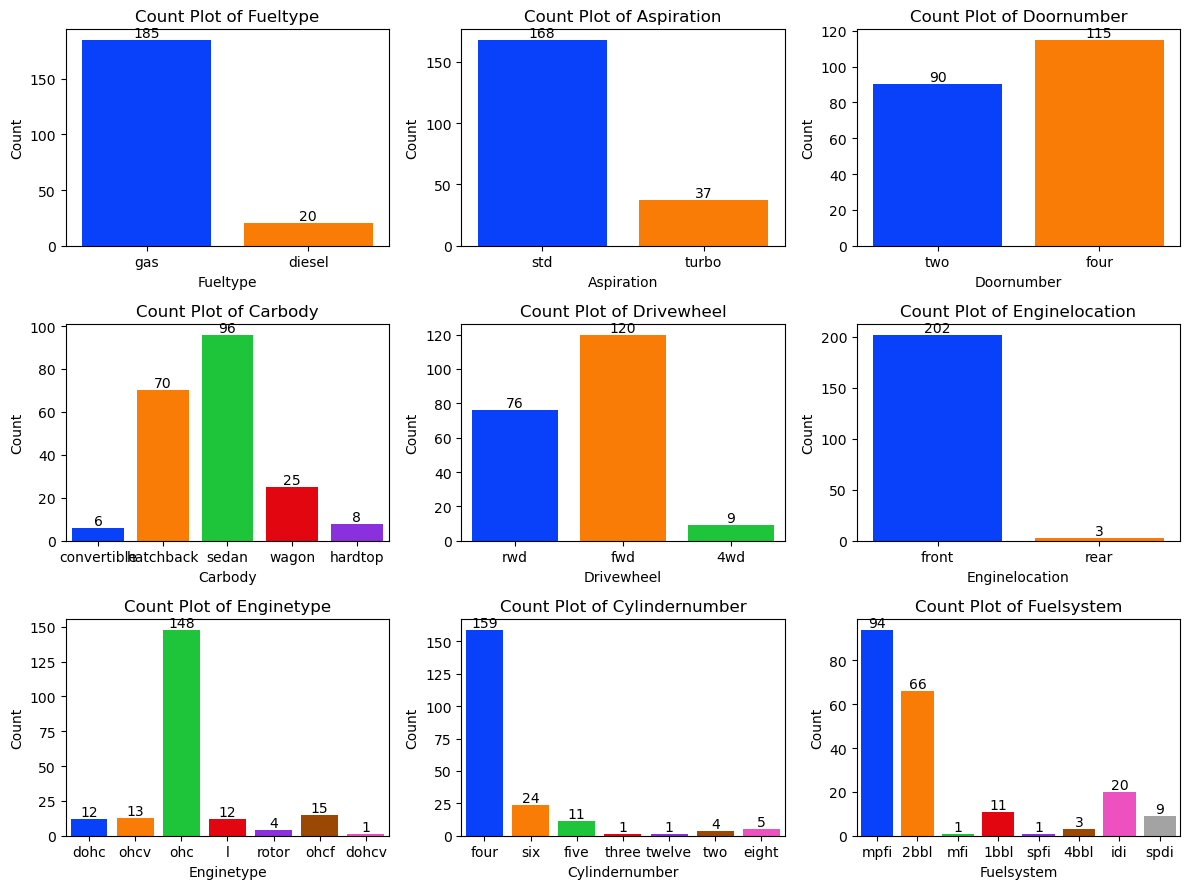

In [107]:
# Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=car[column], data=car, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

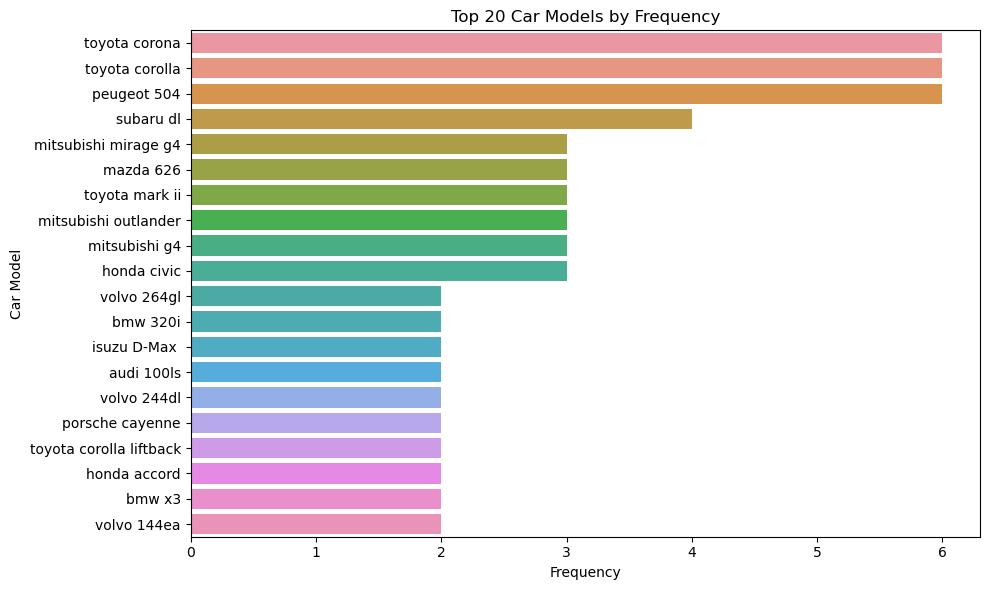

In [108]:
n = 20  # Number of top car models to plot
top_car_models = car['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

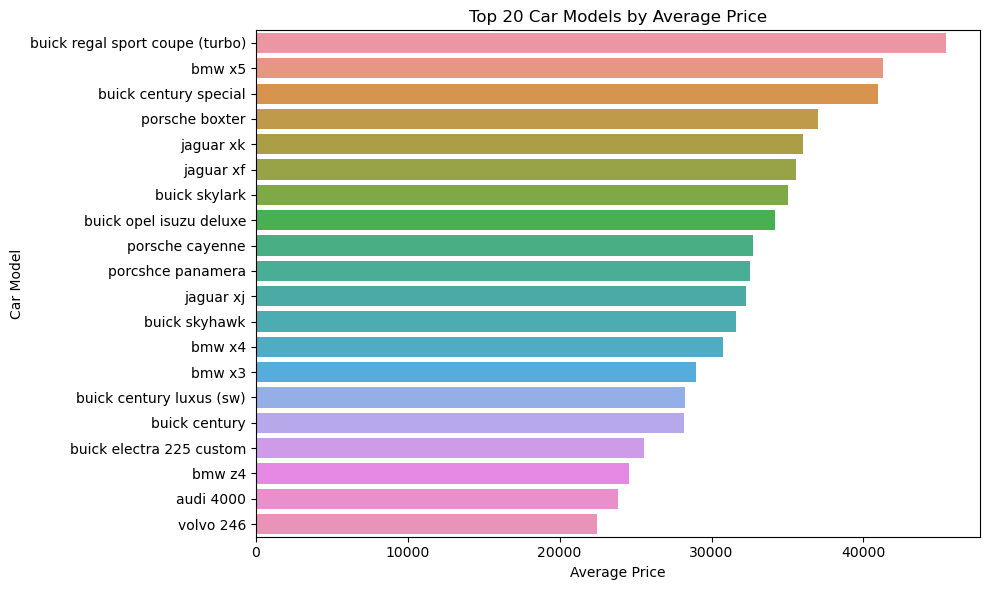

In [109]:
# Calculate average price for each car model
avg_prices_by_car = car.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

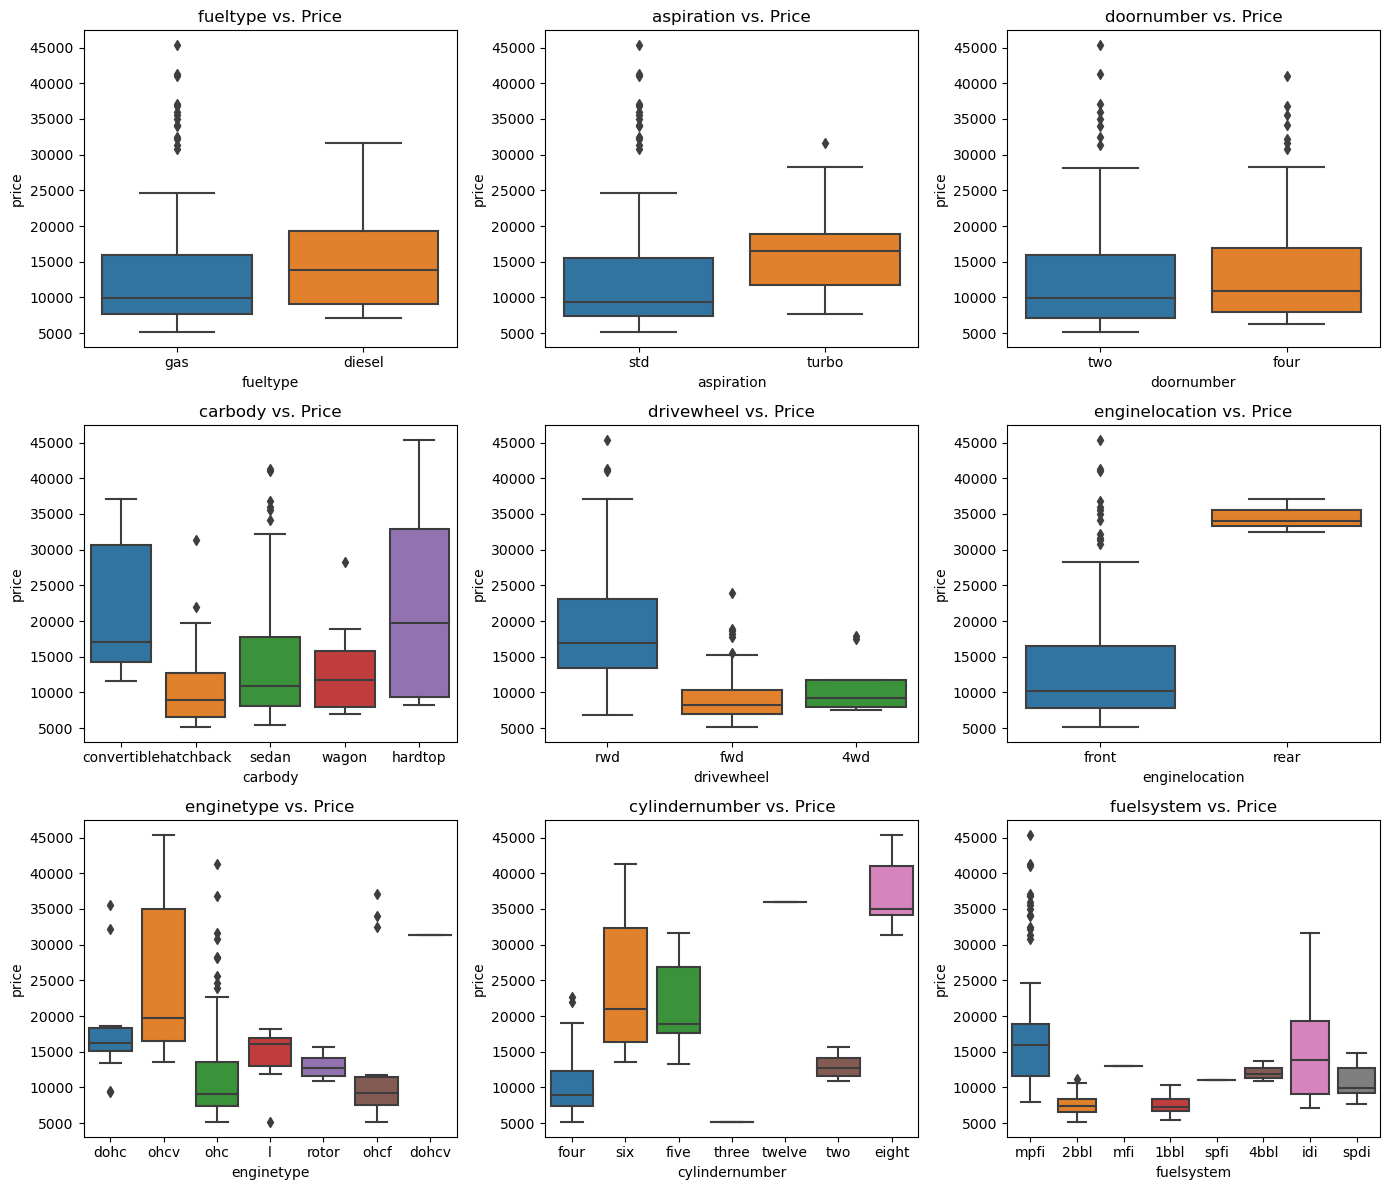

In [110]:
# Categorical Feature vs. Price
plt.figure(figsize=(14, 12))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=car, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

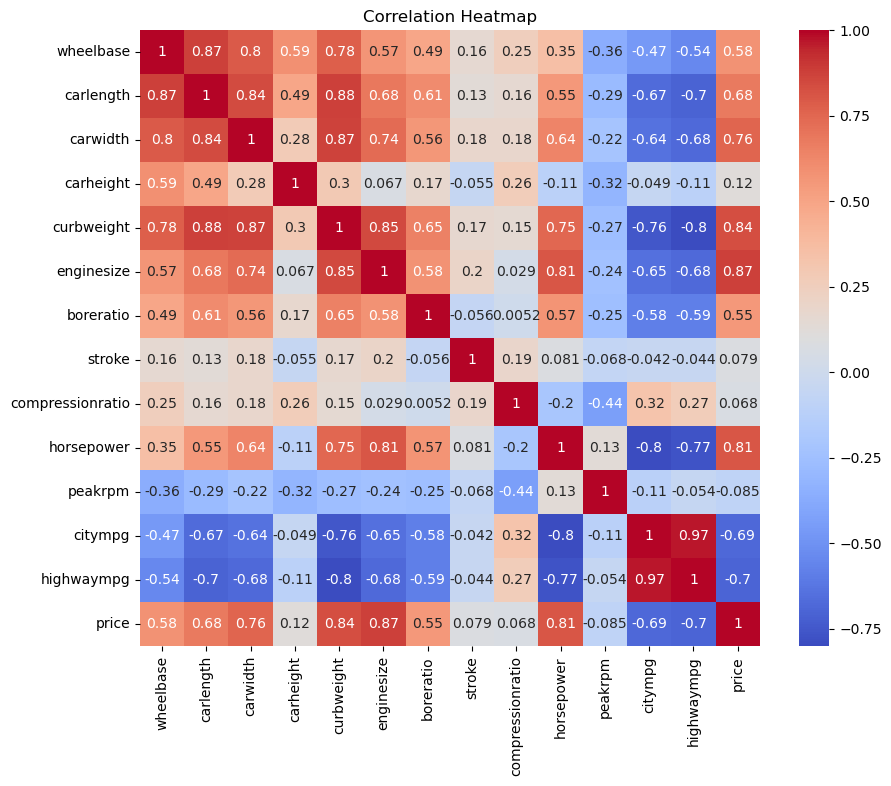

In [111]:
# Correlation Analysis
correlation_matrix = car[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Key Market Insights**  

#### **Popular Car Brands**  
- **Toyota** appears frequently in the dataset, indicating its strong market presence.  

#### **Fuel Type and Pricing**  
- **90% of cars use Gas**, while around **10% use Diesel**.  
- Diesel cars tend to have a **higher average price** compared to Gas-powered cars.  

#### **Aspiration Type**  
- **82% of cars have a standard aspiration**, while **18% use Turbo**.  
- On average, **Turbo cars are more expensive** than standard ones.  

#### **Number of Doors**  
- **56% of cars have 4 doors**, while **44% have 2 doors**.  
- Sports cars maintain a **similar average price** regardless of door count.  

#### **Body Style Preferences**  
- **Sedan is the most popular car type**.  
- **Convertible and Hardtop models** tend to have **higher prices**.  

#### **Drive Wheel Type**  
- **Front-Wheel Drive (FWD) is the most common**, likely due to its **lower cost**.  

#### **Engine and Performance Factors**  
- **Engine size is a key factor**—as it **increases, the price also rises**.  
- The **most common engine type is OHC (Overhead Camshaft)**, which correlates with **lower prices**.  
- As the **number of cylinders increases, the price tends to rise**, though **most cars have 4 cylinders**.  

#### **Vehicle Dimensions and Pricing**  
- **Wheelbase, car length, and car width affect pricing**, with larger dimensions often leading to **higher prices**.  
- **Car height, however, does not appear to have a significant impact on price**.  


### **Pre-Processing**

In [112]:
car["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Our pre_processing part consists to :
- **Extracts brand and model** from the `CarName` column.
- **Encodes categorical variables** (e.g., fuel type, car body) into numerical values using `LabelEncoder`.
- **Creates new features**: 
  - Power-to-weight ratio (`horsepower / curbweight`),
  - Squared values for numerical features,
  - Log-transformed engine size.
- **Scales numerical features** using `StandardScaler` to standardize the data for modeling.


In [113]:
# Extract brand and model from CarName
car['brand'] = car['CarName'].apply(lambda x: x.split(' ')[0])
car['model'] = car['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg', 'price']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    car[column] = label_encoder.fit_transform(car[column])

# Feature engineering
car['power_to_weight_ratio'] = car['horsepower'] / car['curbweight']


### Model Training

In [115]:
# Feature scaling
scaler_X = StandardScaler()  # For features
scaler_y = StandardScaler()  # For target (price)

# Select features (X) and target (y)
X = car.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = car['price']

# Scale features and target
X_scaled = scaler_X.fit_transform(X)  # Scale features
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Scale target

# Splitting the dataset after scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [116]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "AdaBoost": AdaBoostRegressor(random_state=42)
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MSE": mse,
        "R²": r2
    }

# Display the evaluation results
best_model = None
best_r2 = -float('inf')  # Initialize with a very low value to ensure finding the best model

for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {result['MSE']}")
    print(f"  R²: {result['R²']}\n")
    
    # Identify the best model based on R²
    if result['R²'] > best_r2:
        best_r2 = result['R²']
        best_model = model_name

# Display the best model
print(f"The best model is: {best_model} with an R² of {best_r2}")


Linear Regression:
  MSE: 0.1843961806125363
  R²: 0.8516533401675563

Random Forest:
  MSE: 0.055789061358408984
  R²: 0.9551177205503107

Gradient Boosting:
  MSE: 0.07802533335041642
  R²: 0.9372286478689661

Support Vector Machine:
  MSE: 0.1903921705828909
  R²: 0.8468295684303315

K-Nearest Neighbors:
  MSE: 0.3343265522862433
  R²: 0.7310344110154026

Decision Tree:
  MSE: 0.14711761906792273
  R²: 0.8816439292900169

Ridge Regression:
  MSE: 0.18297501118434784
  R²: 0.8527966704525297

Lasso Regression:
  MSE: 1.2441267512374226
  R²: -0.000899516146017465

AdaBoost:
  MSE: 0.10477667084711191
  R²: 0.9157072066411569

The best model is: Random Forest with an R² of 0.9551177205503107


In [120]:
# Predict the scaled prices
y_pred_scaled = models["Random Forest"].predict(X_test)

# Inverse scale the predictions to get the original price values
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)  # Reshape for inverse transform
y_pred_original = scaler_y.inverse_transform(y_pred_scaled_reshaped)
y_test_original= scaler_y.inverse_transform(y_test.reshape(-1,1))


y_pred_original = y_pred_original.flatten()
y_test_original = y_test_original.flatten()


# Display the original price predictions
pred_df=pd.DataFrame({'Actual Value':y_test_original,'Predicted Value':y_pred_original,'Difference':y_test_original-y_pred_original})
pred_df

,Actual Value,Predicted Value,Difference
0,30760.000,35952.225,-5192.225
1,17859.167,19109.730,-1250.563
2,9549.000,8895.470,653.530
3,11850.000,12950.610,-1100.610
4,28248.000,26966.365,1281.635
5,7799.000,6605.940,1193.060
6,7788.000,8072.260,-284.260
7,9258.000,8002.350,1255.650
8,10198.000,9702.980,495.020
9,7775.000,8421.670,-646.670
